In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
import os
import importlib.util

# Load your dataset
df = pd.read_csv("../data/processed_data_helpfulness.csv")

treatment_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
demographics = ['Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income', 'EMP_2010', 'age_var1']

In [36]:

# Optional: import bootstrap from file if needed
bootstrap_path = '../src/Helpfulness_training.py'
spec = importlib.util.spec_from_file_location("Helpfulness_training", bootstrap_path)
ht = importlib.util.module_from_spec(spec)
spec.loader.exec_module(ht)
bootstrap_resample = ht.bootstrap_resample
    # Define inline if not importing
# Label mapping
target_value_labels = {
    0: 'Very Helpful',
    1: 'Somewhat Helpful',
    2: 'Not Helpful'
}

# MH9 Variables
mh_columns = ['MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']
mh_rename = {
    'MH9A': 'Talking to Mental Health Professional',
    'MH9B': 'Engaging in Religious or Spiritual Activities',
    'MH9C': 'Was Talking to Friends or Family',
    'MH9D': 'Taking Prescribed Medication',
    'MH9E': 'Improving Healthy Lifestyle Behaviours',
    'MH9F': 'Making a Change to Work Situation',
    'MH9G': 'Making a Change to Personal Relationships',
    'MH9H': 'Spending Time in Nature'
}
df = df.rename(columns=mh_rename)

C:\Users\Bely\AppData\Local\Temp\ipykernel_3052\1713579885.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


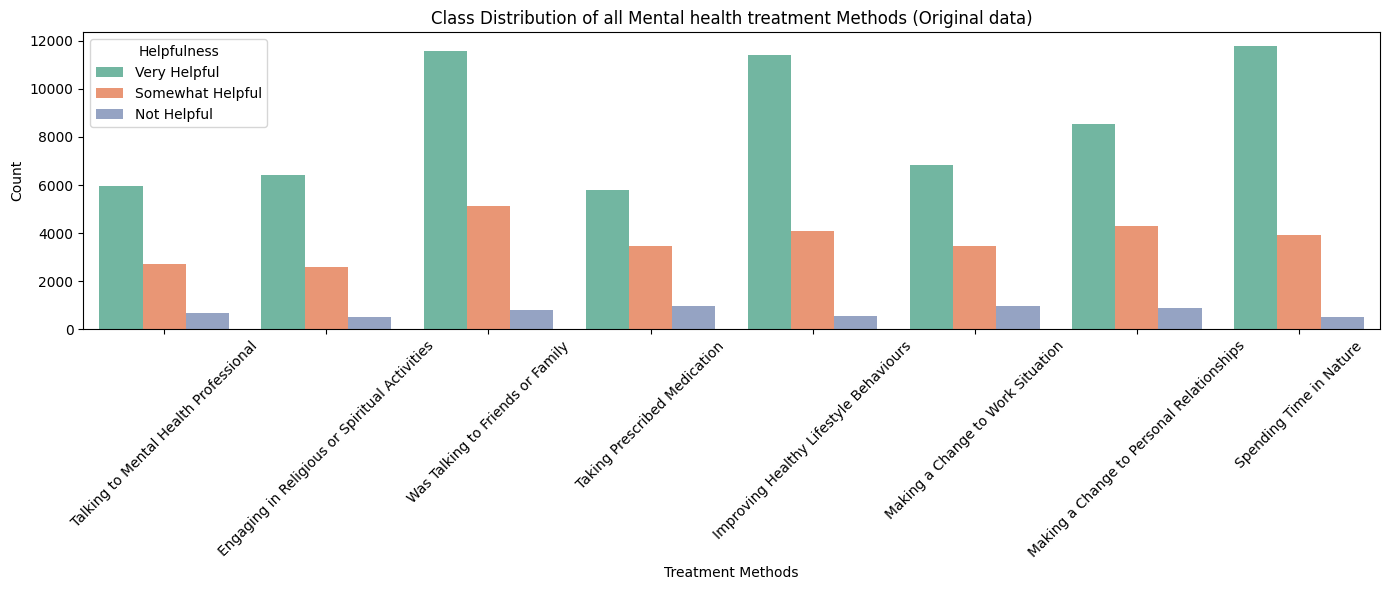

In [27]:

# Store results
all_counts = []

for col in mh_rename.values():
    if col not in df.columns:
        continue

    y_raw = df[df[col] != 99][col]
    y_bal = bootstrap_resample(X=pd.DataFrame(), y=y_raw)[1]

    # Count original and balanced
    raw_counts = Counter(y_raw.map(target_value_labels))
    bal_counts = Counter(y_bal.map(target_value_labels))

    for label in target_value_labels.values():
        all_counts.append({
            "Treatment Methods": col,
            "Helpfulness": label,
            "Count": raw_counts.get(label, 0),
            "Type": "Original"
        })
        all_counts.append({
            "Treatment Methods": col,
            "Helpfulness": label,
            "Count": bal_counts.get(label, 0),
            "Type": "Bootstrapped"
        })

# Convert to DataFrame
counts_df = pd.DataFrame(all_counts)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=counts_df[counts_df['Type'] == 'Original'],
    x="Treatment Methods", y="Count", hue="Helpfulness", palette="Set2", ci=None,
    dodge=True
)
plt.title("Class Distribution of all Mental health treatment Methods (Original data)")
plt.xticks(rotation=45)
plt.legend(title="Helpfulness")
plt.tight_layout()
plt.show()


C:\Users\Bely\AppData\Local\Temp\ipykernel_3052\3209074600.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


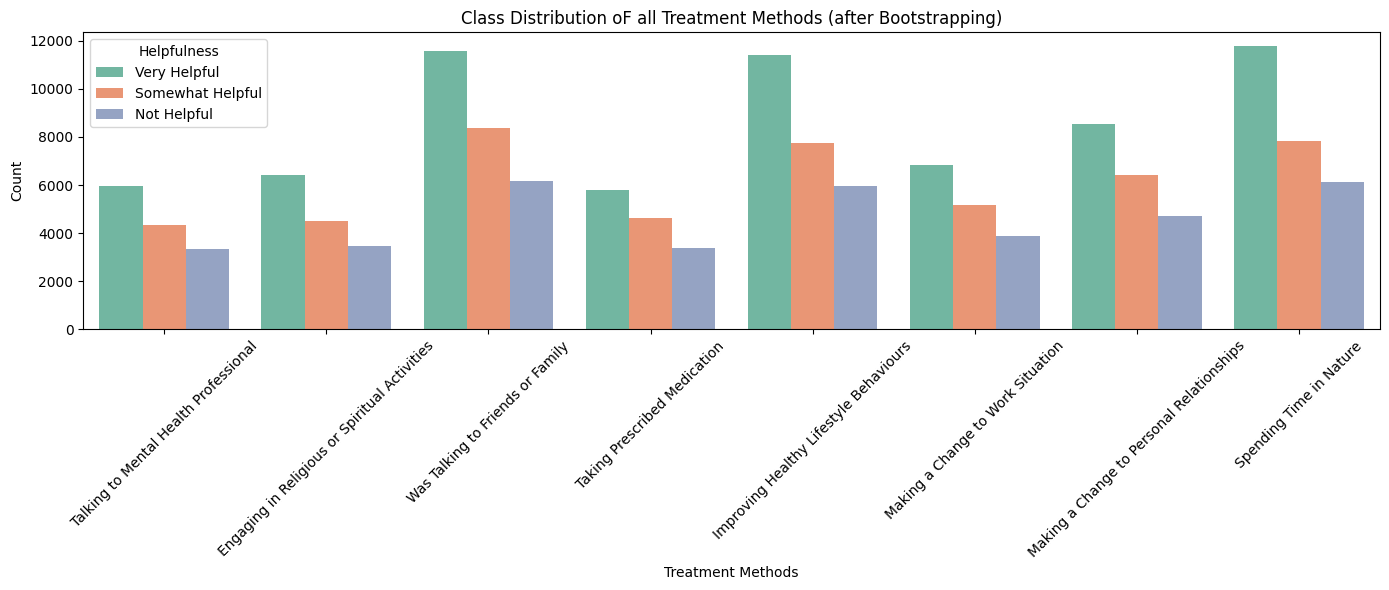

In [28]:


# Convert to DataFrame
counts_df = pd.DataFrame(all_counts)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=counts_df,
    x="Treatment Methods", y="Count", hue="Helpfulness", palette="Set2", ci=None,
    dodge=True
)
plt.title("Class Distribution oF all Treatment Methods (after Bootstrapping)")
plt.xticks(rotation=45)
plt.legend(title="Helpfulness")
plt.tight_layout()
plt.show()


In [37]:

# Define the label mappings for target variables and demographics
label_mappings = {
    'Gender': {
        1: 'Male',
        2: 'Female'
    },
    'Education': {
        0: 'Elementary or less (≤8 yrs)',
        1: 'Secondary (8–15 yrs)',
        2: 'Tertiary (16+ yrs)'
    },
    'Household_Income': {
        0: 'Poorest 20%',
        1: 'Second 20%',
        2: 'Middle 20%',
        3: 'Fourth 20%',
        4: 'Richest 20%'
    },
     'age_var1': {
        0: '15-29',
        1: '30-49',
        2: '50+'
    },
    
}


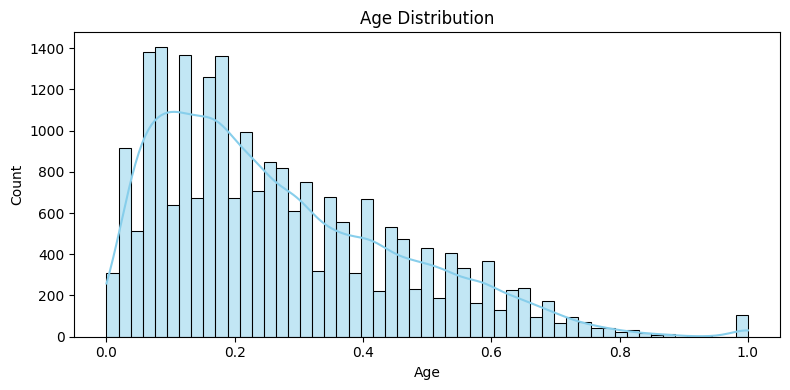

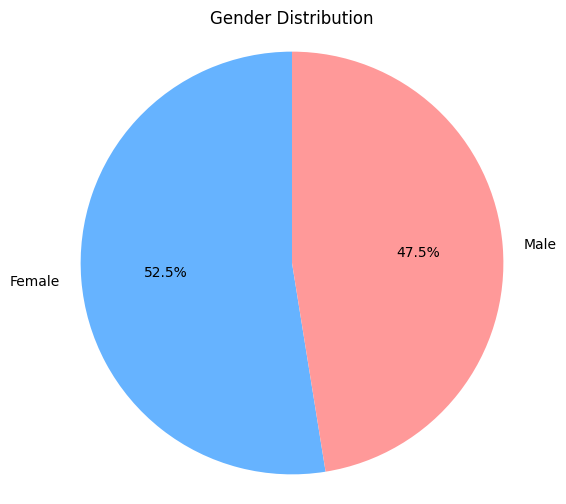

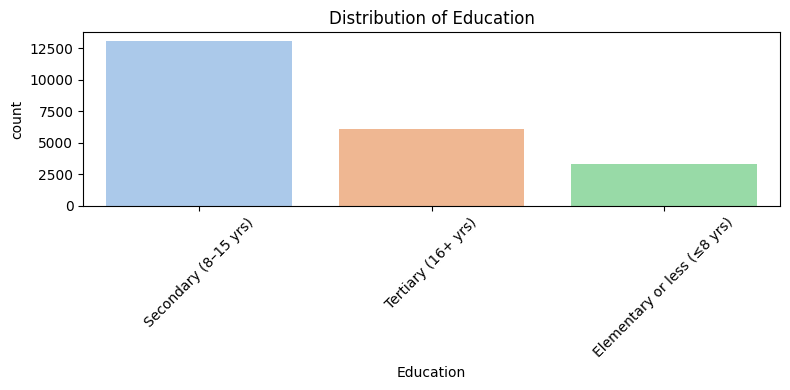

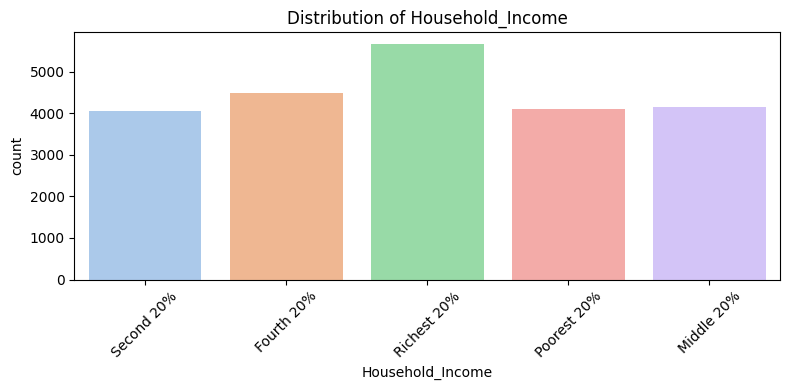

In [38]:

# Apply label mapping to demographics columns
for col, mapping in label_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Demographics to visualize (already mapped in previous cells)
demographics_to_plot = ['Age', 'Gender', 'Education', 'Household_Income']

# Loop for plotting (bar for most, pie for Gender)
for col in demographics_to_plot:
    if col not in df.columns:
        continue

    # Pie chart for Gender
    if col == 'Gender':
        gender_counts = df[col].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(
            gender_counts,
            labels=gender_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff', '#ff9999']
        )
        plt.title('Gender Distribution')
        plt.axis('equal')
        plt.show()

    # Histogram for Age
    elif col == 'Age':
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title('Age Distribution')
        plt.tight_layout()
        plt.show()

    # Bar plots for other categorical variables
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


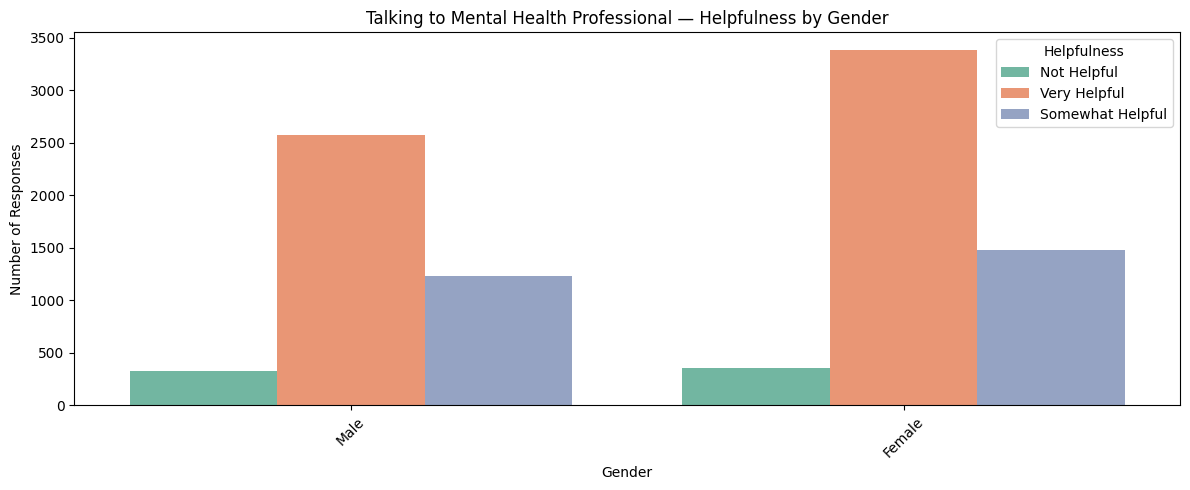

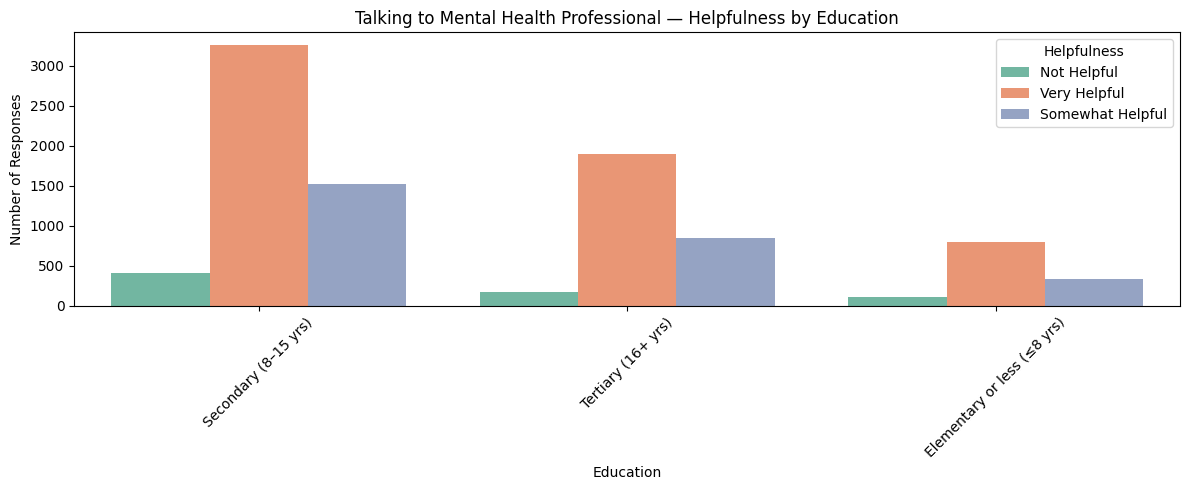

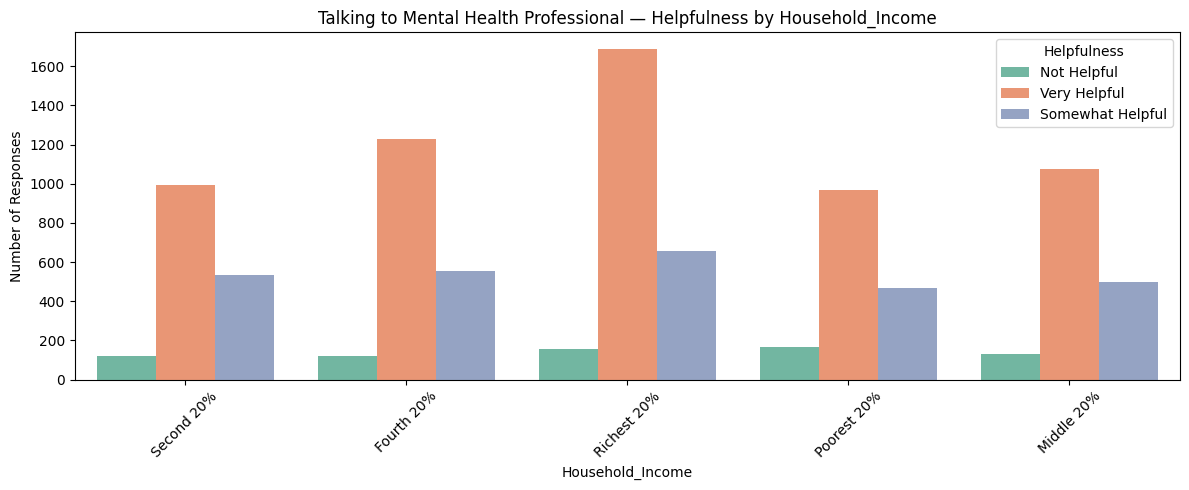

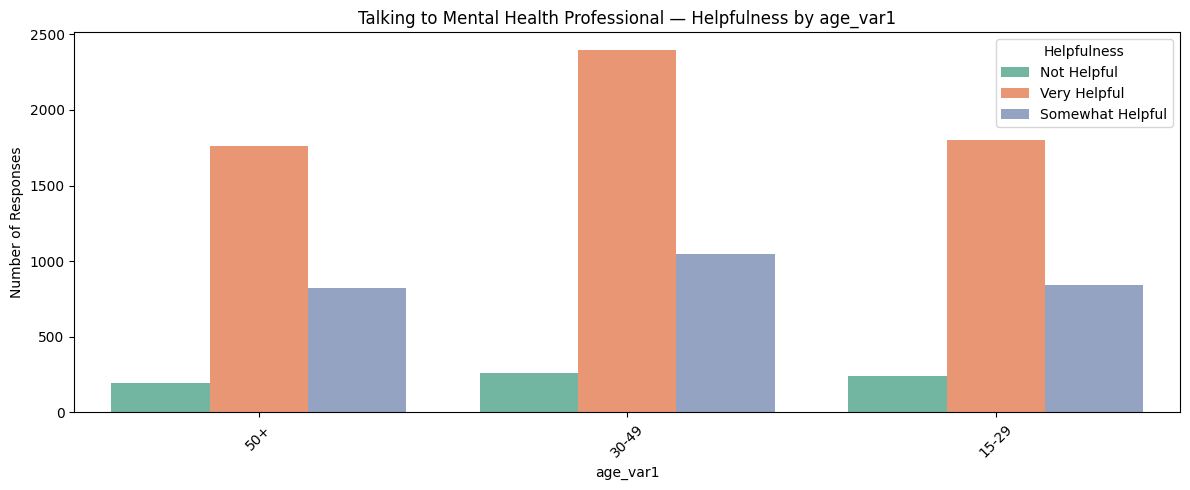

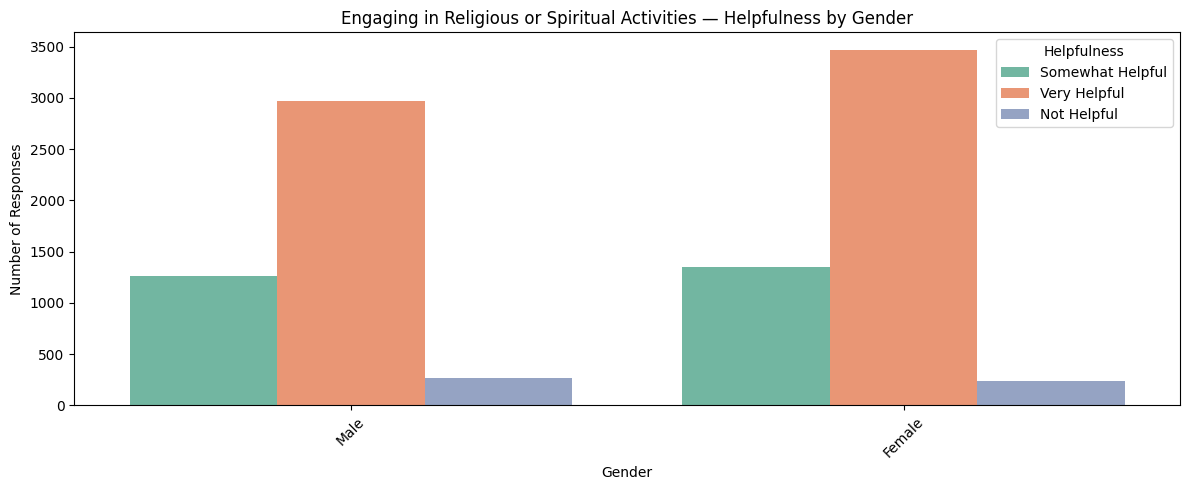

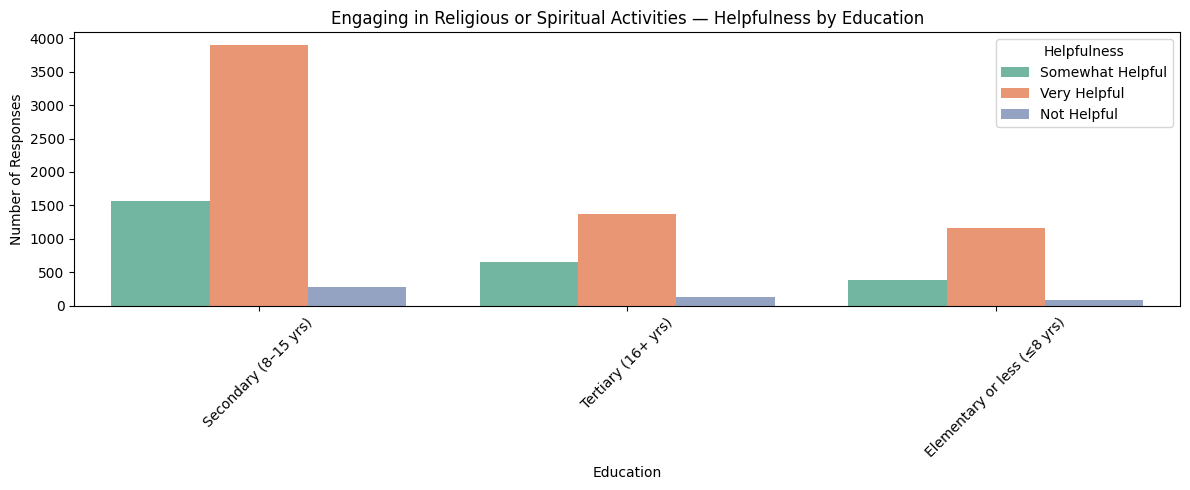

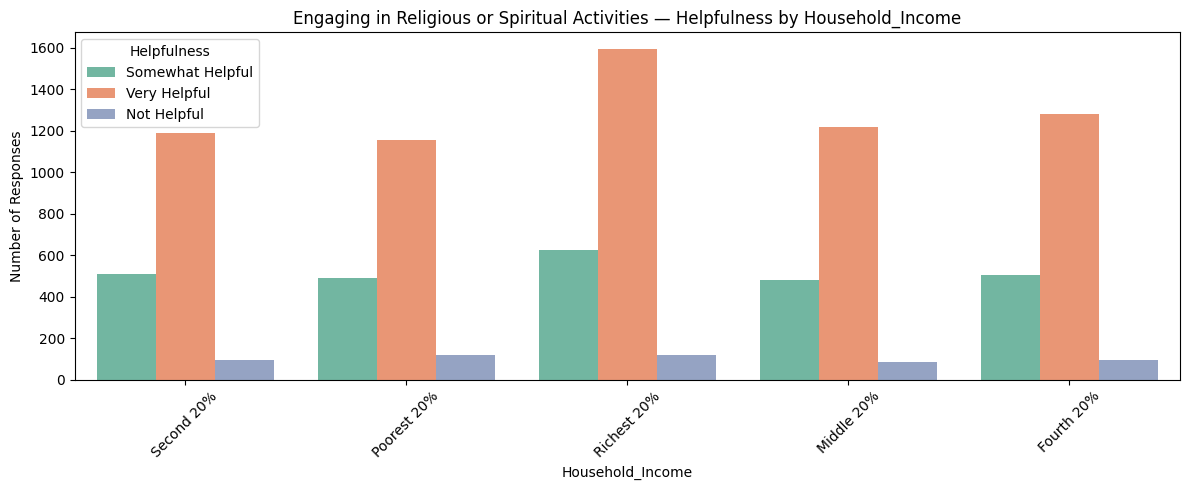

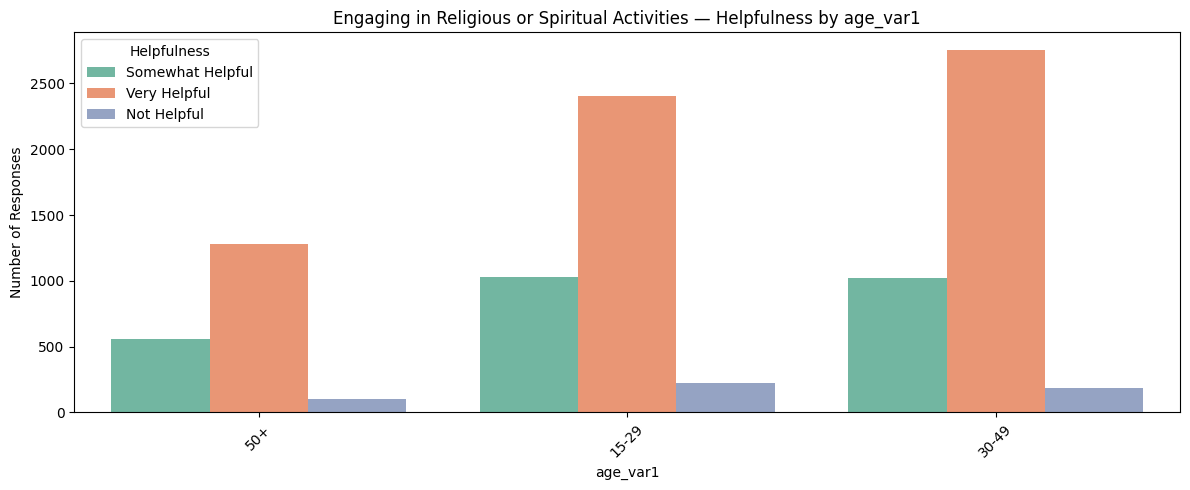

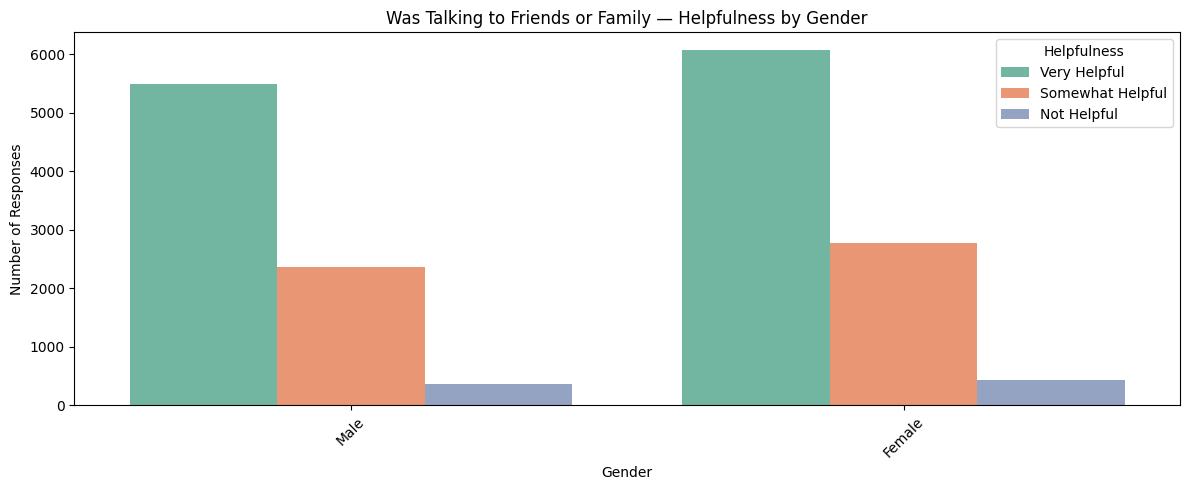

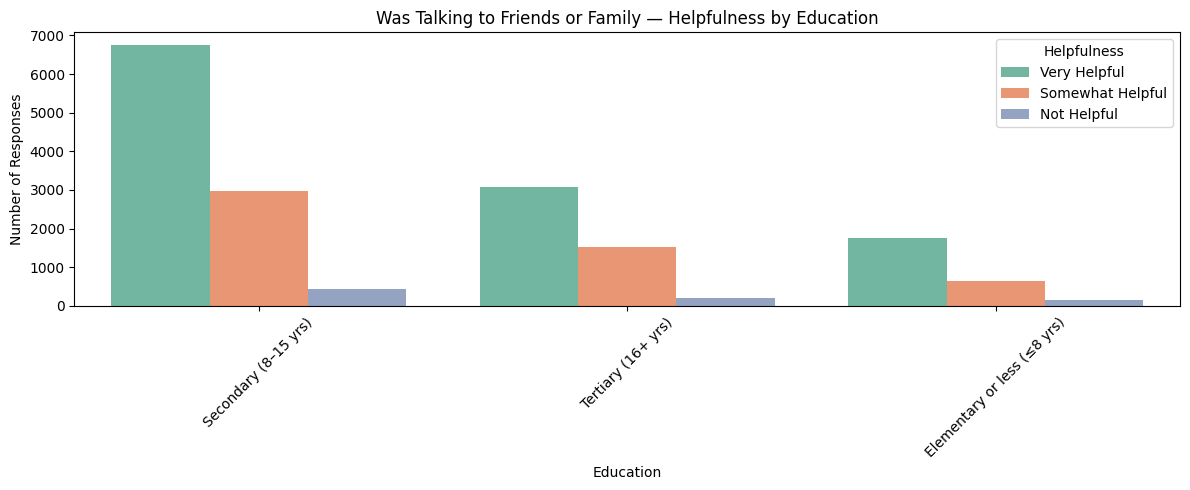

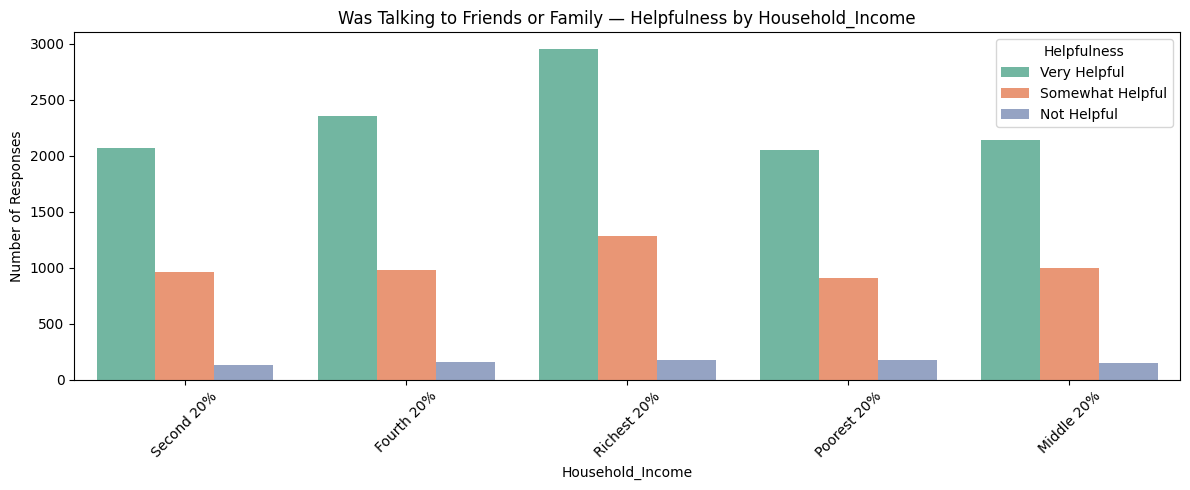

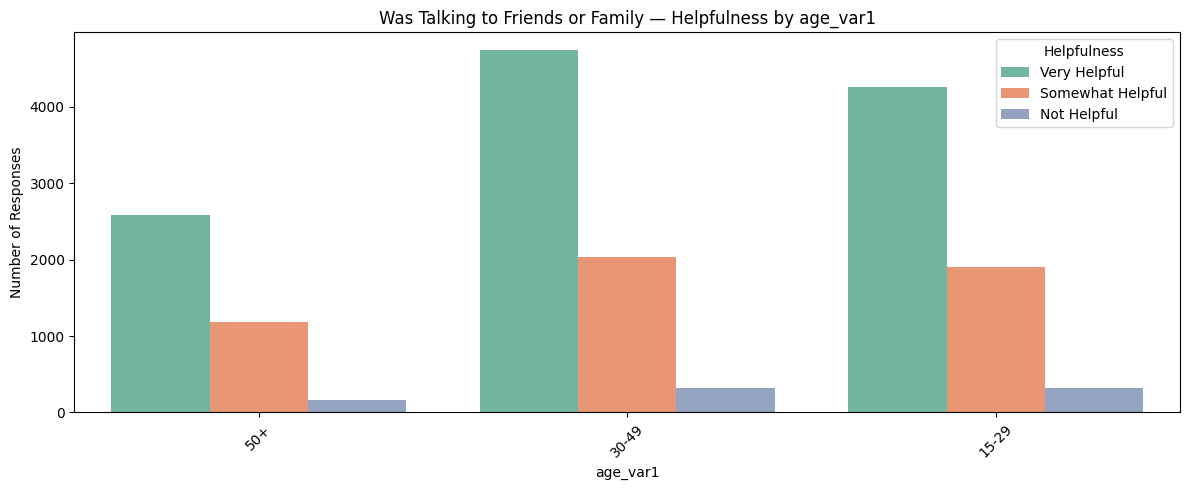

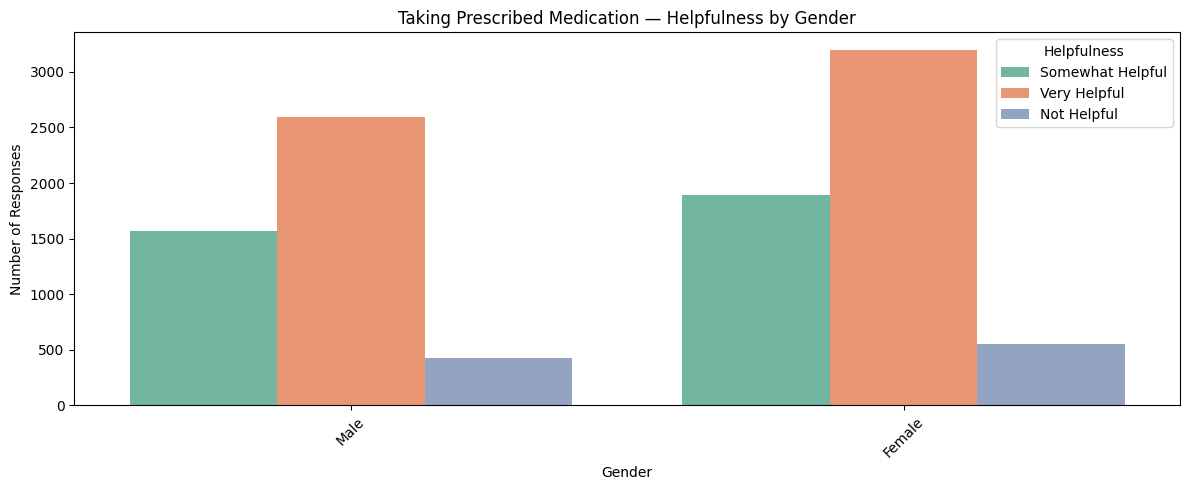

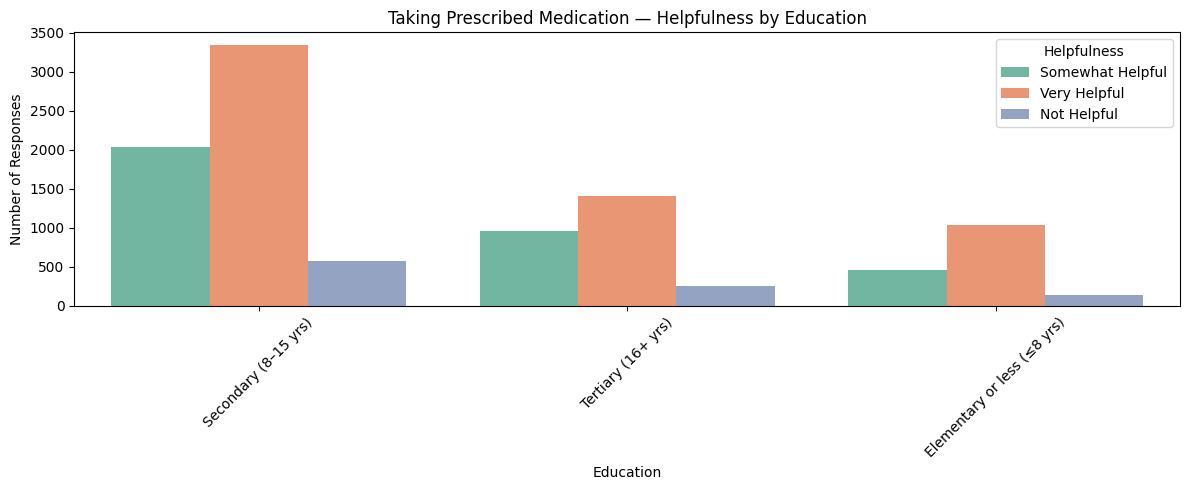

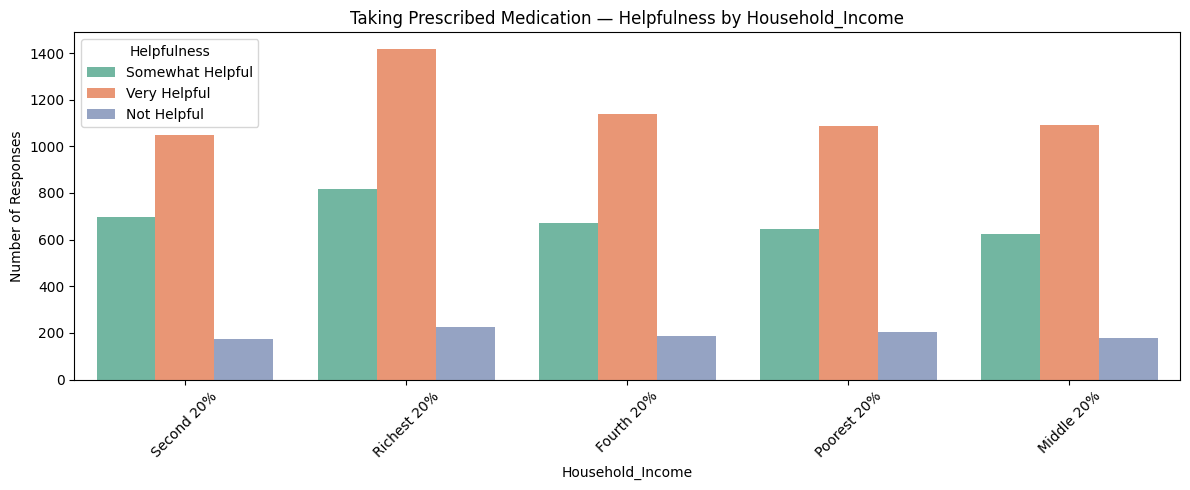

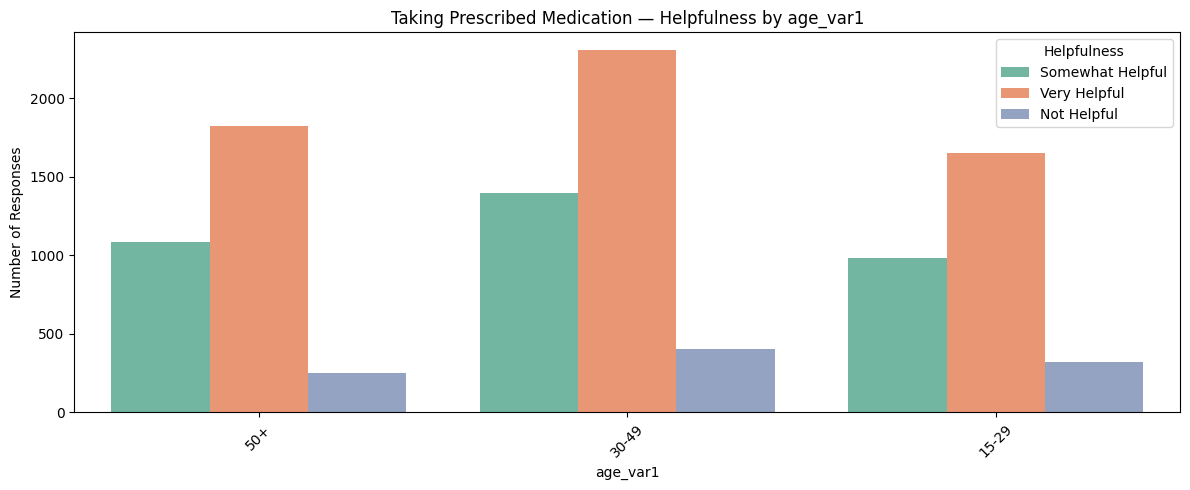

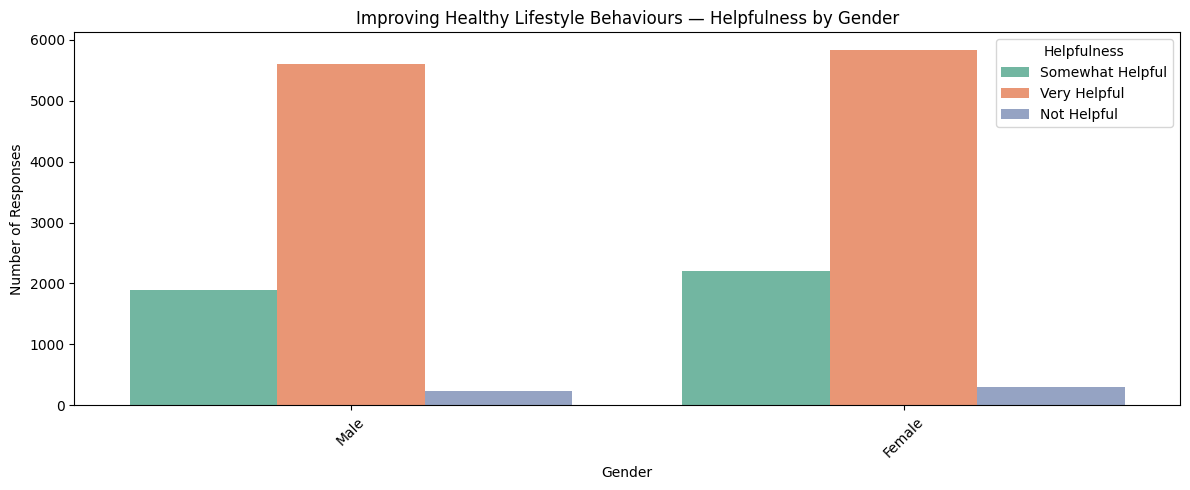

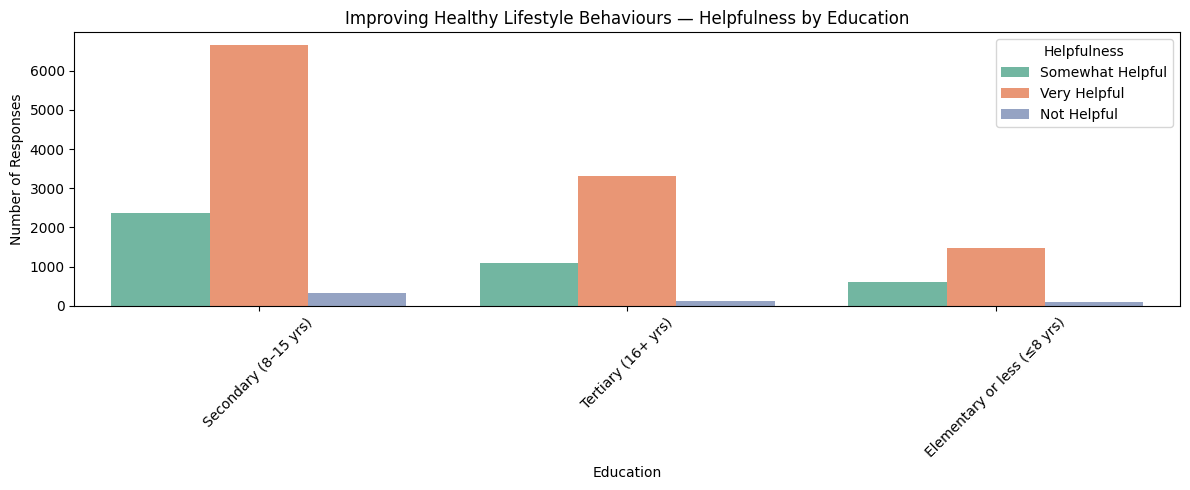

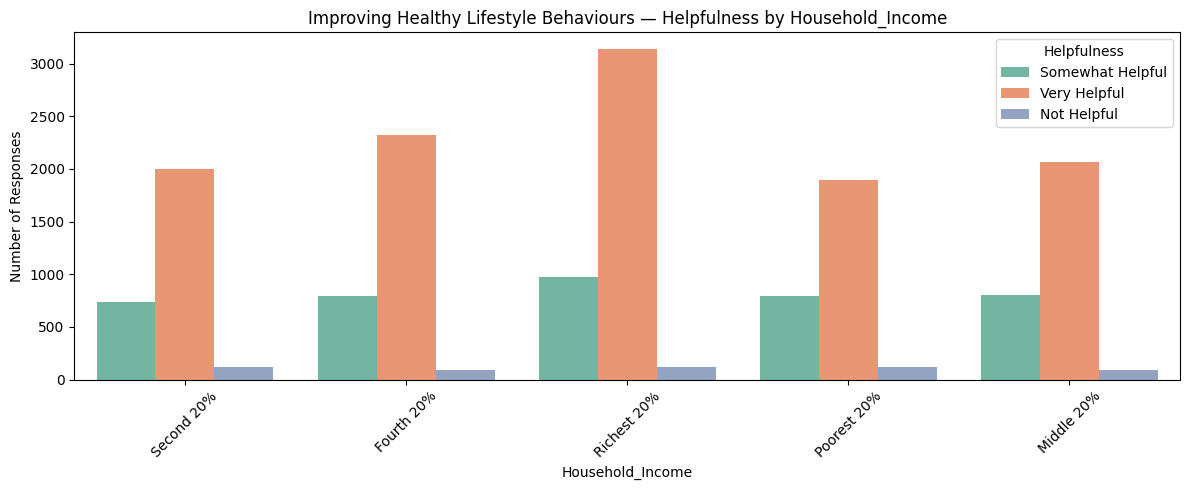

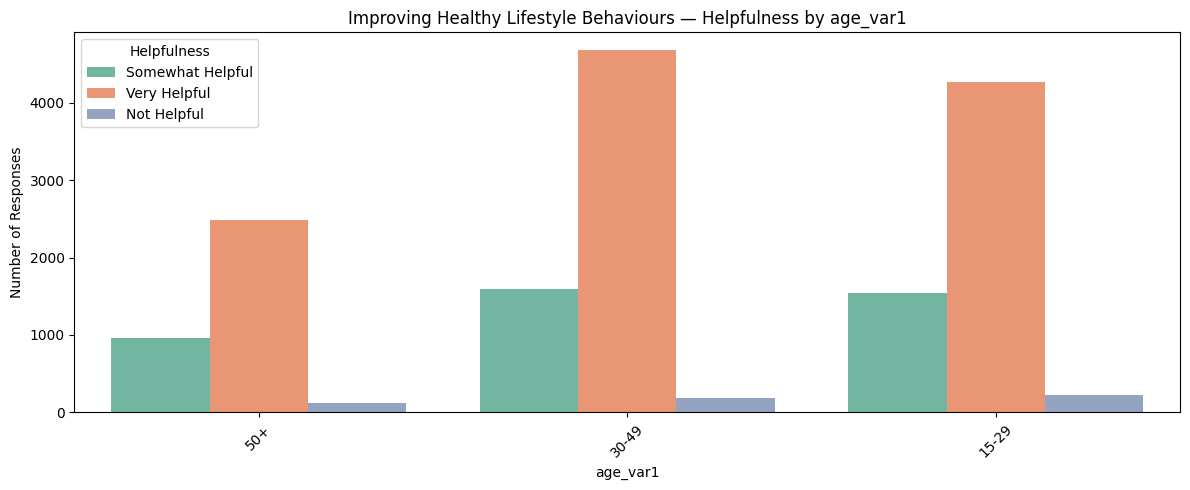

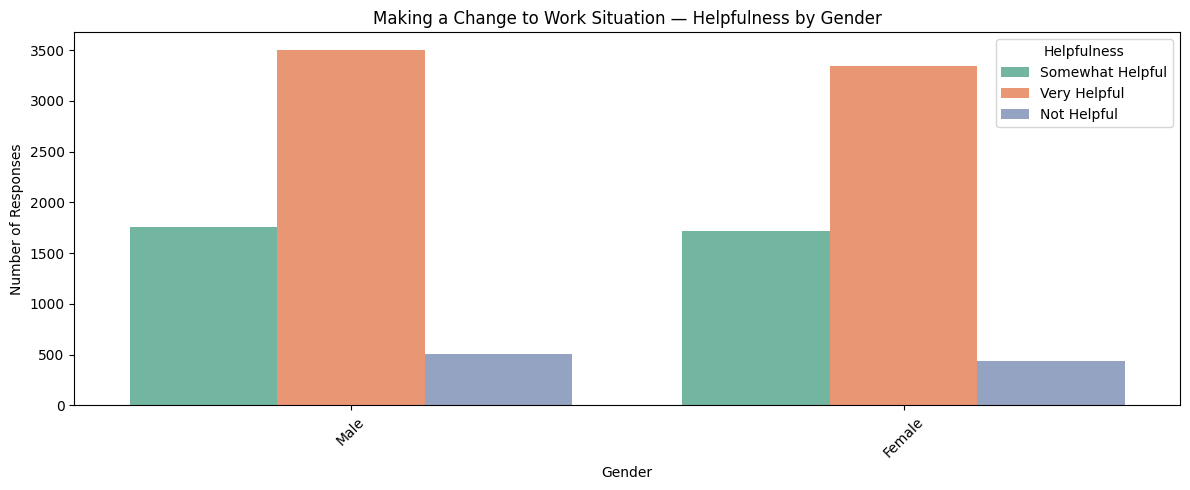

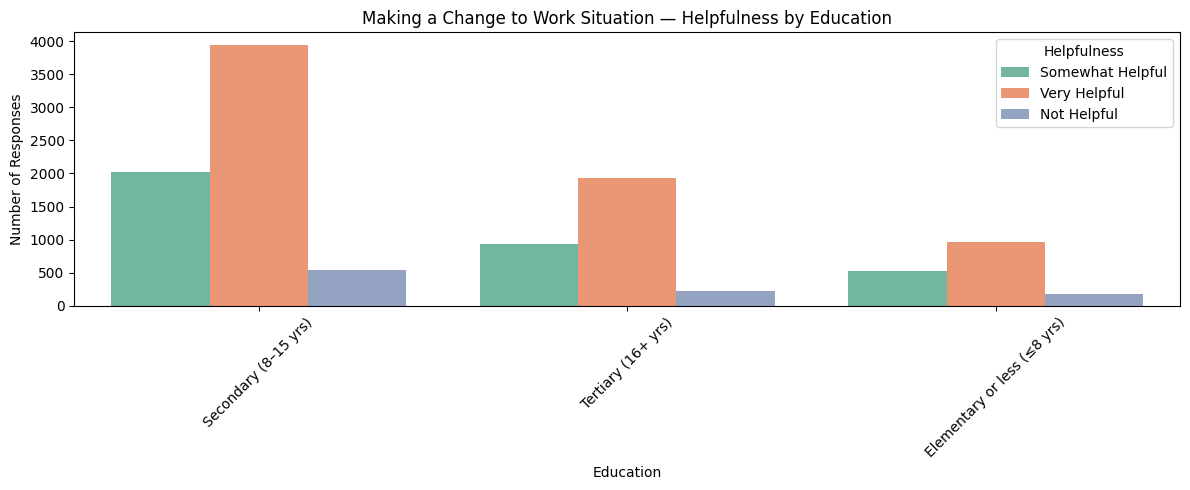

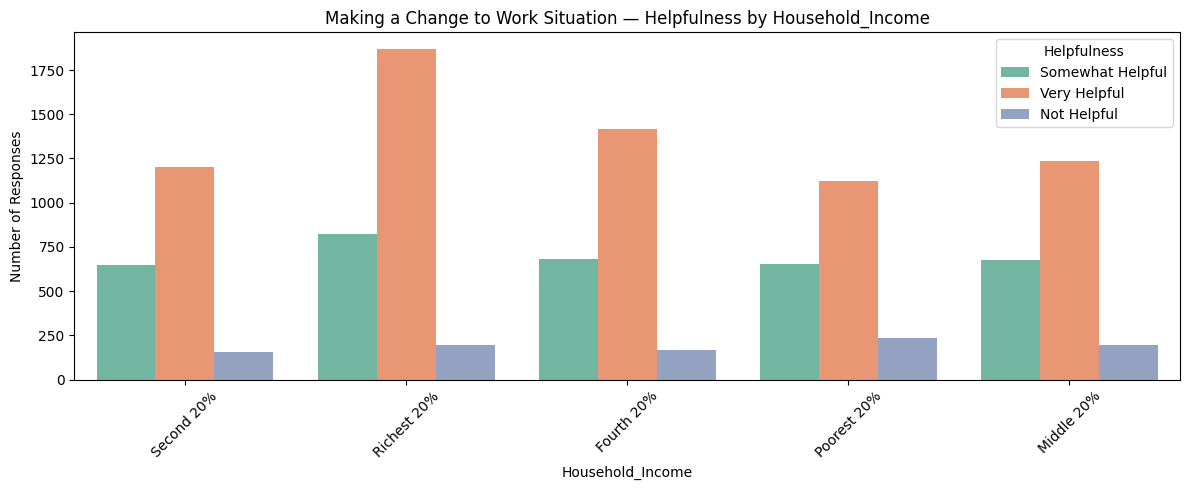

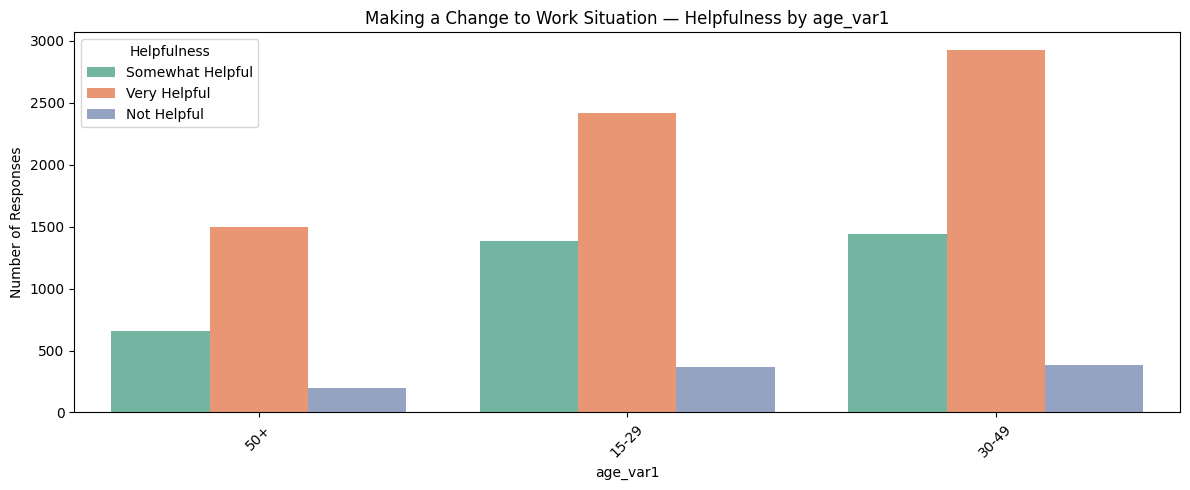

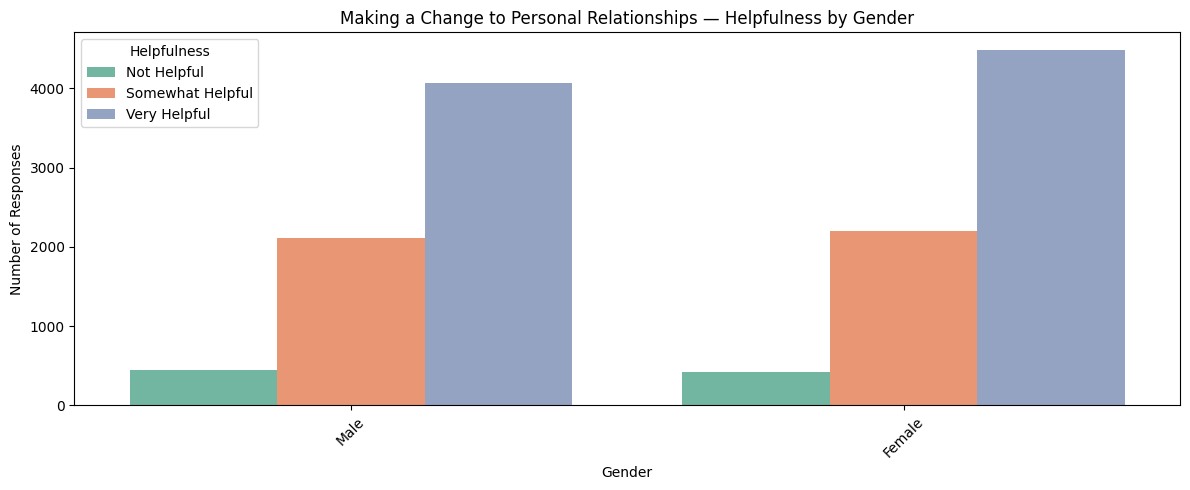

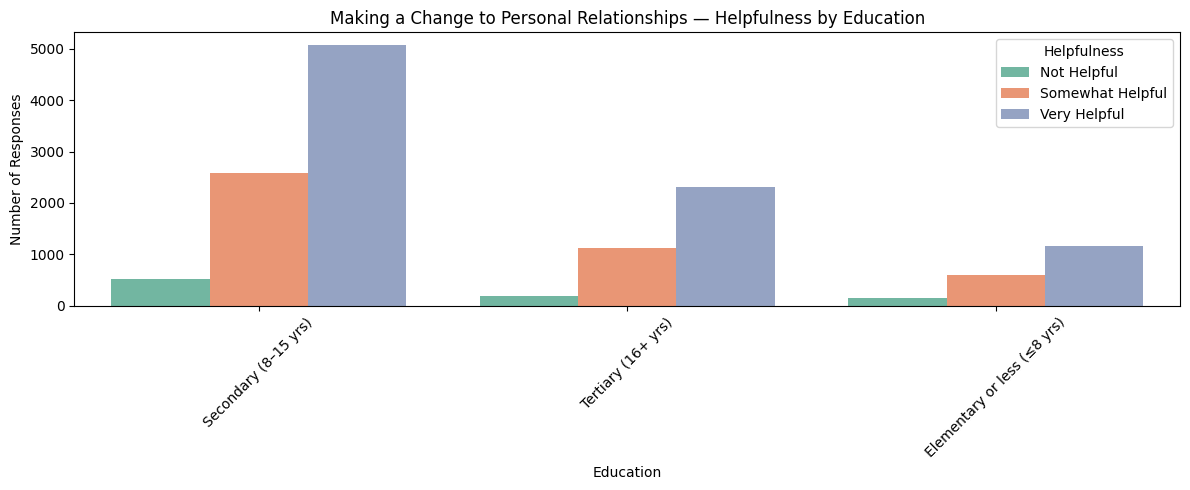

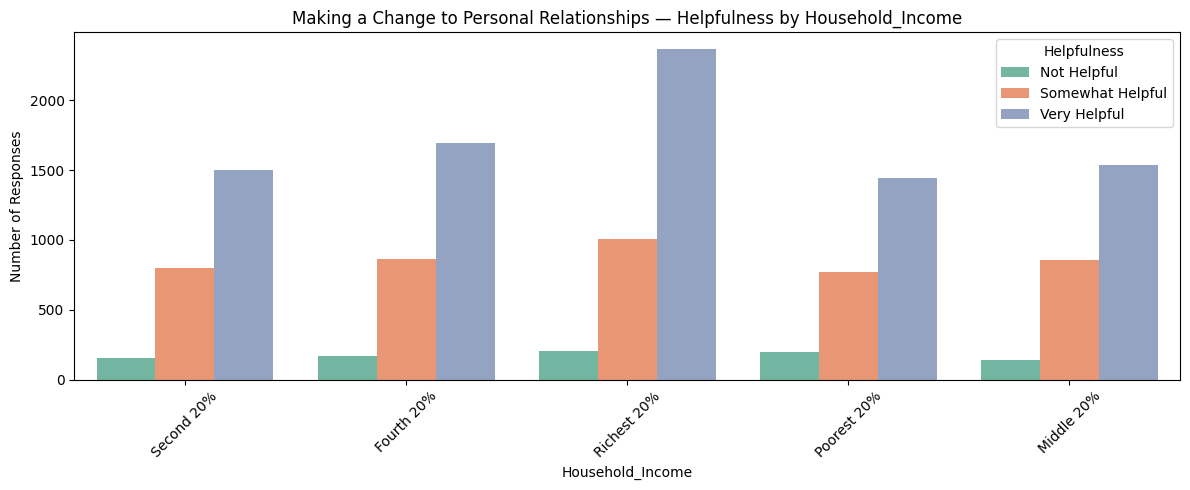

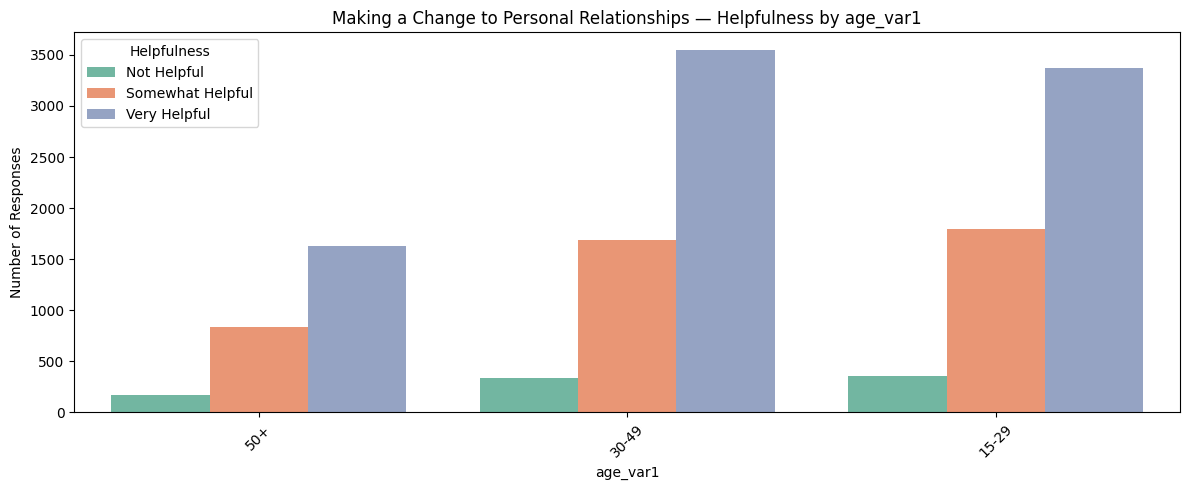

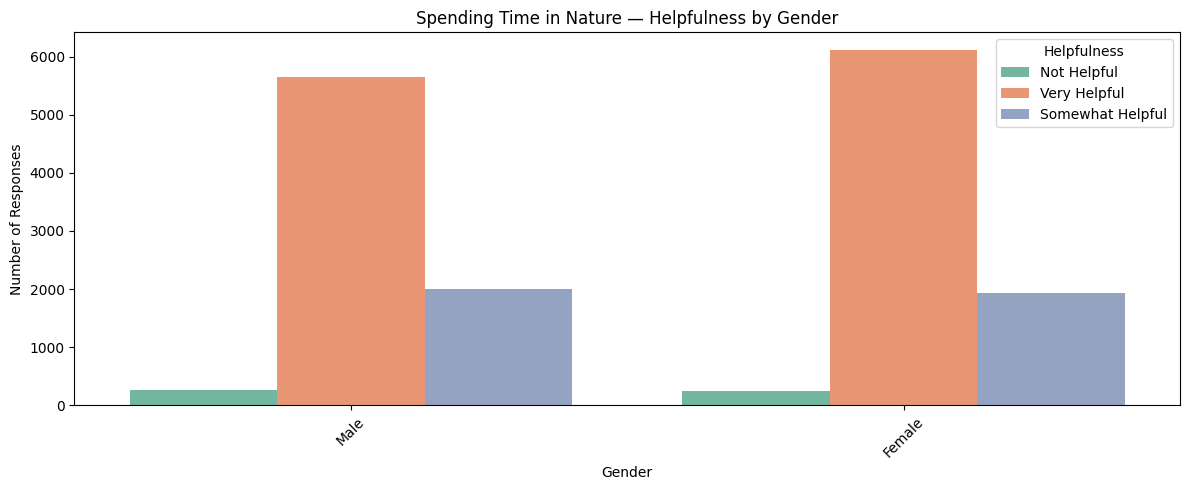

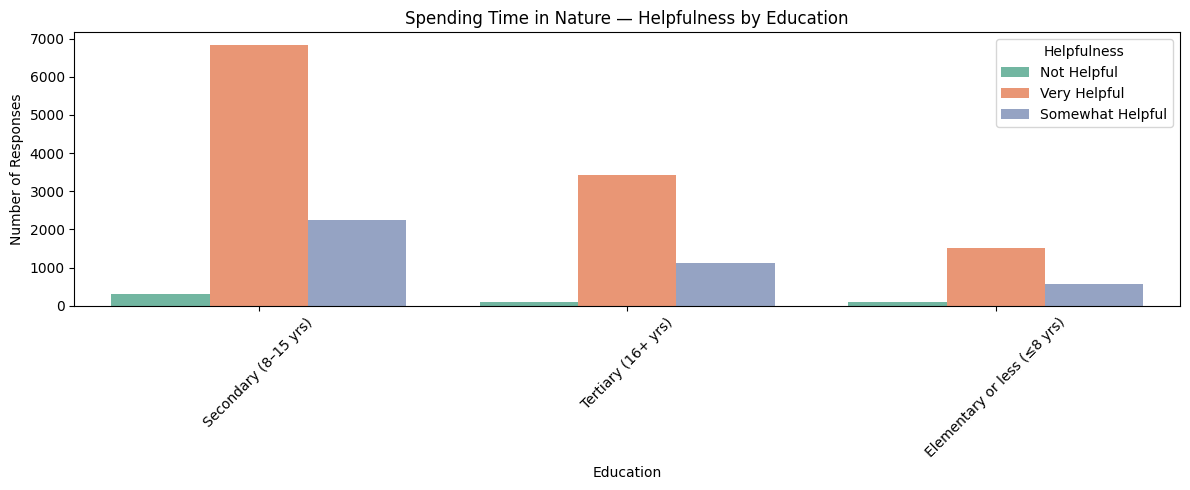

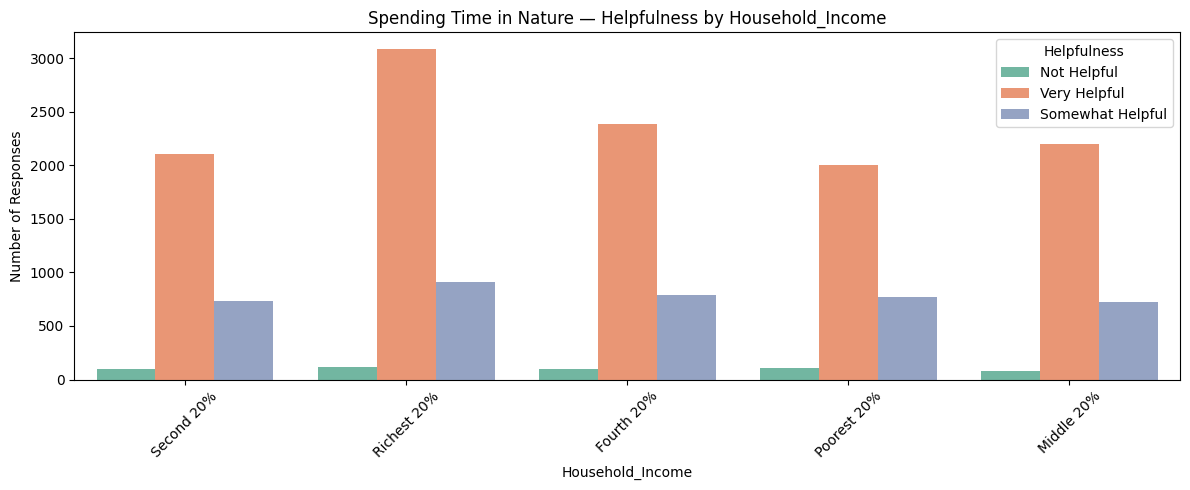

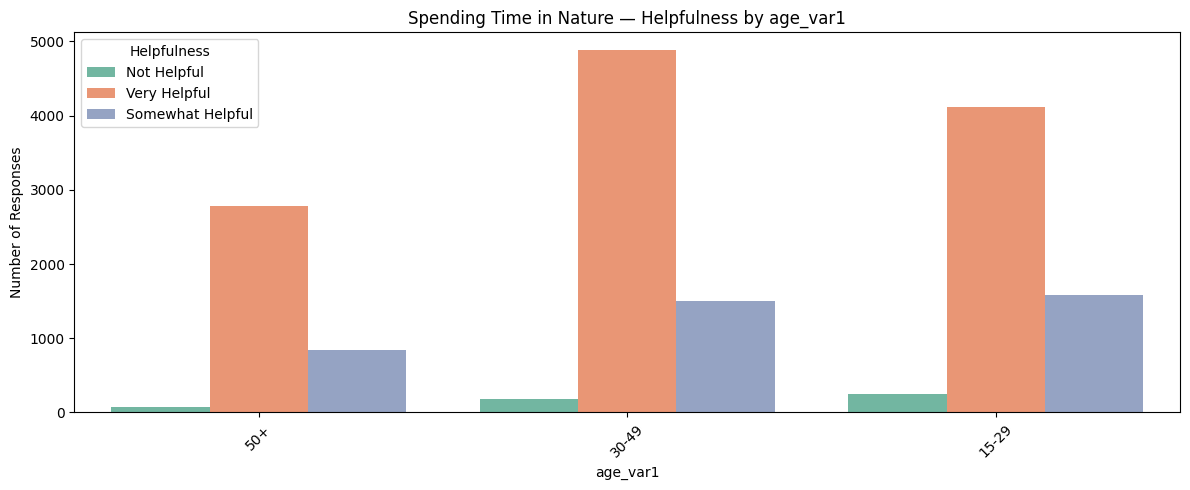

In [10]:
# First, ensure label mappings are applied to a copy of your DataFrame
df_labeled = df.copy()

# Apply demographic label mappings
for col, mapping in label_mappings.items():
    if col in df_labeled.columns:
        df_labeled[col] = df_labeled[col].map(mapping)

# Now analyze and plot each treatment method against each demographic
for treatment_col in mh_rename.values():
    if treatment_col not in df_labeled.columns:
        continue
    
    for demo_col, demo_mapping in label_mappings.items():
        if demo_col not in df_labeled.columns:
            continue

        # Subset for valid helpfulness responses (not 99)
        subset = df_labeled[df_labeled[treatment_col] != 99]

        # Map helpfulness labels
        subset = subset.copy()
        subset['Helpfulness_Label'] = subset[treatment_col].map(target_value_labels)

        # Plot
        plt.figure(figsize=(12, 5))
        sns.countplot(
            data=subset,
            x=demo_col,
            hue='Helpfulness_Label',
            palette='Set2'
        )
        plt.title(f"{treatment_col} — Helpfulness by {demo_col}")
        plt.xlabel(demo_col)
        plt.ylabel("Number of Responses")
        plt.xticks(rotation=45)
        plt.legend(title="Helpfulness")
        plt.tight_layout()
        plt.show()
